In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


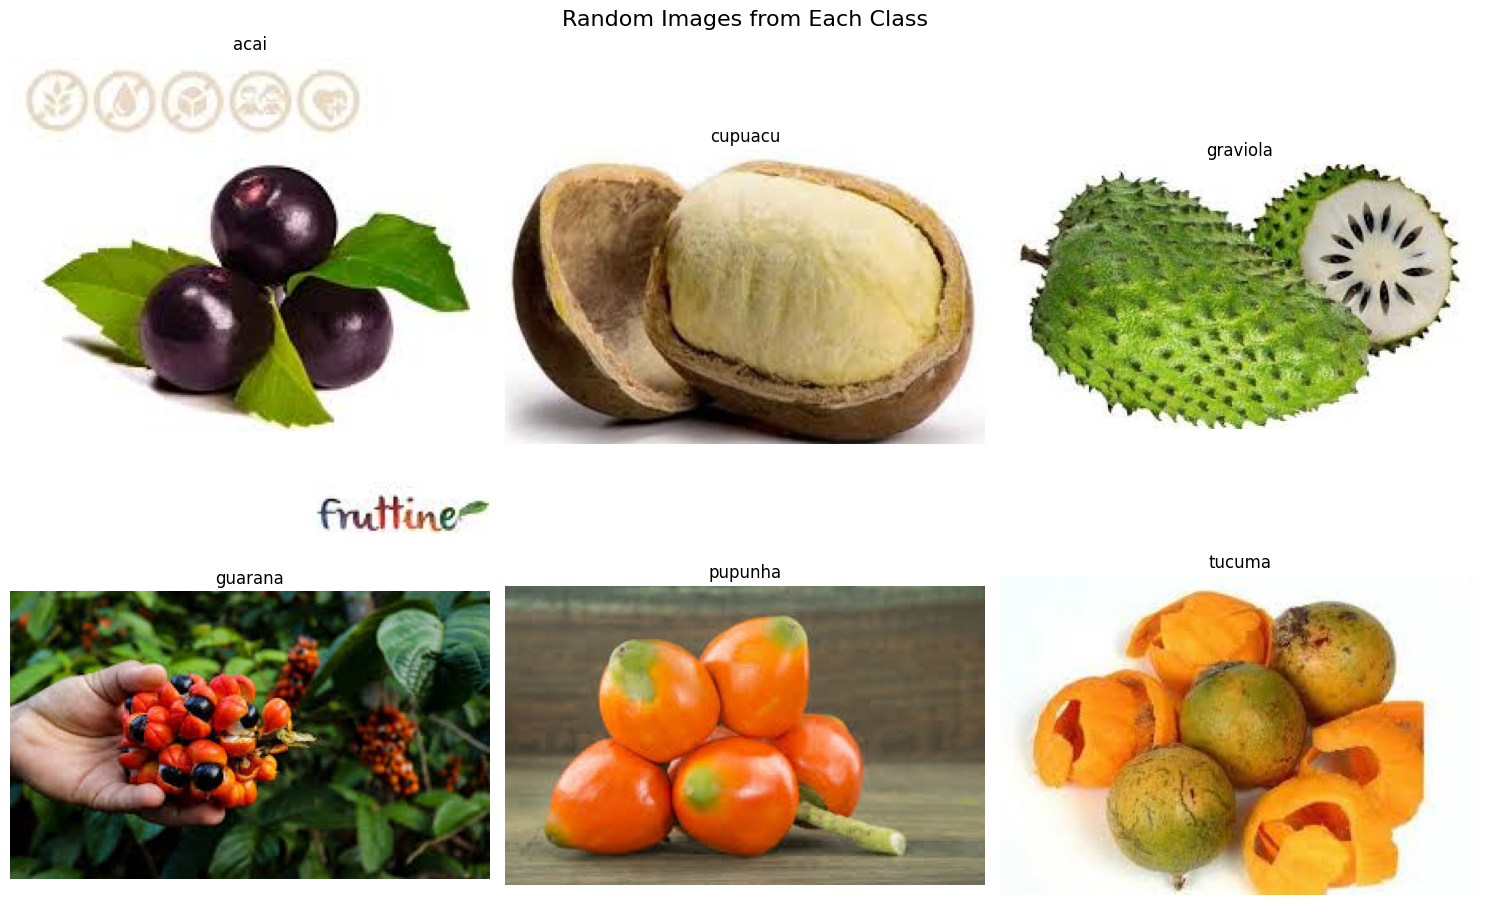

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the train directory path
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/FruitinAmazon/test'

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_dirs.sort()  # Sort for consistent order
print(f"Found {len(class_dirs)} classes: {class_dirs}")

# Select one random image from each class
images = []
class_names = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Ensure there’s at least one image
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(image_path)
        class_names.append(class_dir)

# Check if we have images to display
if not images:
    raise ValueError("No images found in the dataset!")

# Display images in a 2-row grid
rows = 2
cols = (len(images) + 1) // 2  # Ceiling division to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size as needed
fig.suptitle("Random Images from Each Class", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each image
for i, (image_path, class_name) in enumerate(zip(images, class_names)):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Hide axes

# Hide any unused subplots (if odd number of classes)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os

# Dictionary to store class counts
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)

for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")

print("=" * 45)  # Closing separator



Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


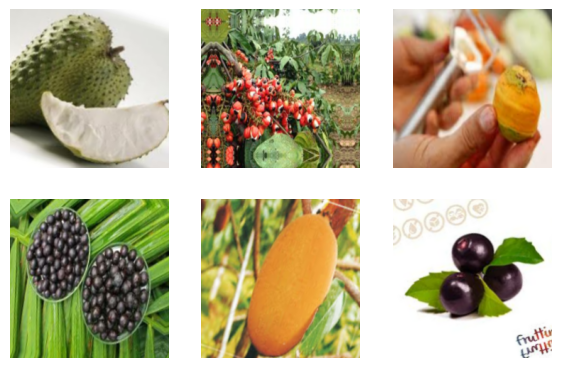

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Load train and test datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=img_size,
    batch_size=batch_size
)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

# Visualizing augmented images
def visualization(dataset):
    plt.figure(figsize=(7, 7))

    for images, _ in dataset.take(1):  # Take one batch
        for i in range(6):  # Show 6 images
            image = tf.expand_dims(images[i], axis=0)  # Expand dimensions to match batch format
            augmented_img = data_augmentation(image)  # Apply augmentation
            augmented_img = tf.squeeze(augmented_img)  # Remove batch dimension

            plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_img.numpy().astype("uint8"))
            plt.axis("off")

    plt.show()

# Call the function (must be outside the function definition)
visualization(train_dataset)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Lambda, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np


# Define the model using the Sequential API with a list of layers
model = Sequential([
    # Data augmentation applied using Lambda layer
    layers.Lambda(data_augmentation, input_shape=(224, 224, 3)),
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255),
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Flatten the output of the last Conv2D layer
    Flatten(),
    # First Fully Connected Layer
    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Second Fully Connected Layer
    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Third Fully Connected Layer
    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Fourth Fully Connected Layer
    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Output Layer with 10 neurons (for classification task with 10 classes)
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])


# Summary of the model
model.summary()

checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save best model
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,  # Stop after 20 epochs with no improvement
    mode='max',
    verbose=1
)
# Train model
histroy = model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset,
    callbacks=[checkpoint, early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,257,930 (100.17 MB)

 Trainable params: 26,255,050 (100.16 MB)

 Non-trainable params: 2,880 (11.25 KB)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1471 - loss: 3.1656
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 20s/step - accuracy: 0.1464 - loss: 3.1172 - val_accuracy: 0.1000 - val_loss: 2.3050
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1419 - loss: 2.8515
Epoch 2: val_accuracy did not improve from 0.10000
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.1425 - loss: 2.8673 - val_accuracy: 0.0667 - val_loss: 2.3058
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0899 - loss: 2.6372
Epoch 3: val_accuracy did not improve from 0.10000
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.0841 - loss: 2.6489 - val_accuracy: 0.0667 - val_loss: 2.3369
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1367 - loss: 2.6882
Epoch 4: val_accuracy improved from 0.10000 to 0.16667, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.1386 - l

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Load VGG16 base model (without top, pretrained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze all convolutional layers

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create model (this was the part that broke)
model = Model(inputs=base_model.input, outputs=predictions)

# NOW we compile it (without any misplaced arguments)
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    'vgg16_best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    verbose=1
)

# Train
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0869 - loss: 16.7187 
Epoch 1: val_accuracy improved from -inf to 0.23333, saving model to vgg16_best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 27s/step - accuracy: 0.0874 - loss: 16.5694 - val_accuracy: 0.2333 - val_loss: 4.1813
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.0824 - loss: 13.2879 
Epoch 2: val_accuracy improved from 0.23333 to 0.43333, saving model to vgg16_best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 128s 26s/step - accuracy: 0.0924 - loss: 12.7358 - val_accuracy: 0.4333 - val_loss: 2.1290
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.2882 - loss: 7.7146 
Epoch 3: val_accuracy did not improve from 0.43333
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 26s/step - accuracy: 0.2995 - loss: 7.6384 - val_accuracy: 0.3667 - val_loss: 1.5979
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.3544 - loss: 5.0586 
Epoch 4: val_accuracy improved from 0.43333 to 0.50000, saving model to vgg16_best_

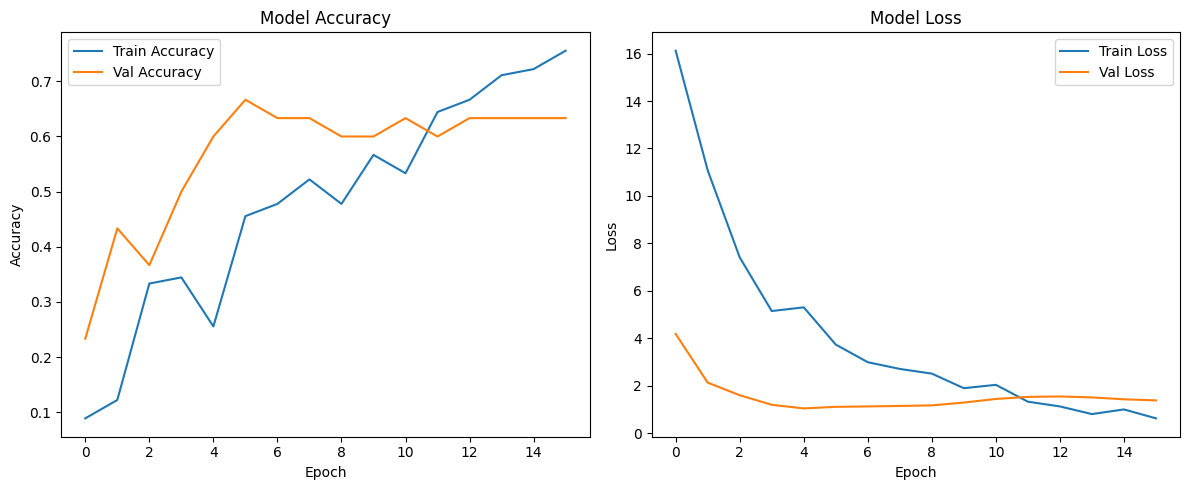

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_true = np.concatenate([y for _, y in test_dataset], axis=0)
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# Report
print(classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       1.00      0.60      0.75         5
           2       0.67      0.80      0.73         5
           3       1.00      0.80      0.89         5
           4       0.50      0.40      0.44         5
           5       0.60      0.60      0.60         5

    accuracy                           0.63        30
   macro avg       0.69      0.63      0.65        30
weighted avg       0.69      0.63      0.65        30

